In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [6]:
df=pd.read_csv("adult.csv")

In [7]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# No missing values

In [12]:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)


obj_col=object_cols(df)

In [13]:
le = LabelEncoder()

for col in obj_col:
    df[col] = le.fit_transform(df[col])


In [14]:
df
# income <=50k: 0, >50k :1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


<AxesSubplot:>

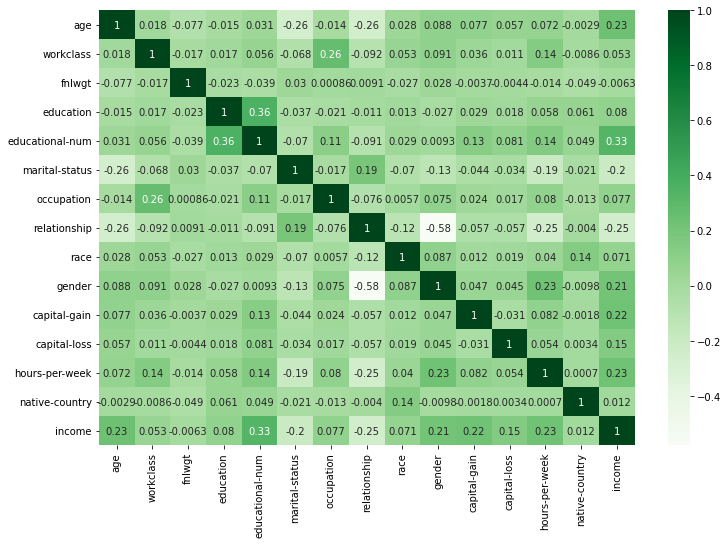

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Greens")

In [16]:
X=df.drop(['income'], axis=1)
y=df['income']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=101)

In [19]:
scaler=StandardScaler()

In [20]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
model=KNeighborsClassifier(n_neighbors=15)

In [23]:
model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [24]:
y_pred= model.predict(scaled_X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
confusion_matrix(y_test, y_pred)

array([[10252,   870],
       [ 1493,  2038]], dtype=int64)

In [27]:
accuracy_score(y_test, y_pred)

0.8387360949976114

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11122
           1       0.70      0.58      0.63      3531

    accuracy                           0.84     14653
   macro avg       0.79      0.75      0.76     14653
weighted avg       0.83      0.84      0.83     14653



In [29]:
import warnings
warnings.filterwarnings(action='ignore')

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
k= np.arange(1,31)


In [32]:
params={"n_neighbors": k,"metric":['minkowski', 'eucledian']}

In [33]:
grid_model = GridSearchCV(estimator =model, param_grid=params, cv =6)

In [34]:
grid=grid_model.fit(scaled_X_train, y_train)

In [35]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 22}

In [36]:
grid.best_score_

0.8378719277999854

In [37]:
#testing

model=KNeighborsClassifier(n_neighbors=22)
model.fit(scaled_X_train, y_train)
y_pred2= model.predict(scaled_X_test)

In [38]:
confusion_matrix(y_test, y_pred2)

array([[10363,   759],
       [ 1603,  1928]], dtype=int64)

In [39]:
accuracy_score(y_test, y_pred2)

0.8388043404081076

In [40]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11122
           1       0.72      0.55      0.62      3531

    accuracy                           0.84     14653
   macro avg       0.79      0.74      0.76     14653
weighted avg       0.83      0.84      0.83     14653

